In [2]:
# import general packages, check folders
#%reset
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from pathlib import Path

# TO DO - REMOVE THE UNNECESSARY LIBRARY IMPORTS

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [3]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'

In [4]:
#suff= ''
suff = '_corrected'

In [5]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,f'responses{suff}.npy'))
responses.shape # subs *movies

(1049, 10)

In [6]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vidnames

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

In [7]:
'''count = 0
count_run1 = 0
count_run2 = 0
for s in range(responses1.shape[0]):
    if len(np.where(np.isnan(responses1[s,:]))[0]) != 0:
        #print(s,responses1[s,:])
        count +=1
    
    if (len(np.where(np.isnan(responses1[s,:5]))[0]) != 0) & (len(np.where(np.isnan(responses1[s,5:]))[0]) == 0):
        #print(s,responses1[s,:])
        count_run1 +=1
    
    if (len(np.where(np.isnan(responses1[s,5:]))[0]) != 0) & (len(np.where(np.isnan(responses1[s,:5]))[0]) == 0):
        #print(s,responses1[s,:])
        count_run2 +=1
count,count_run1,count_run2'''

'count = 0\ncount_run1 = 0\ncount_run2 = 0\nfor s in range(responses1.shape[0]):\n    if len(np.where(np.isnan(responses1[s,:]))[0]) != 0:\n        #print(s,responses1[s,:])\n        count +=1\n    \n    if (len(np.where(np.isnan(responses1[s,:5]))[0]) != 0) & (len(np.where(np.isnan(responses1[s,5:]))[0]) == 0):\n        #print(s,responses1[s,:])\n        count_run1 +=1\n    \n    if (len(np.where(np.isnan(responses1[s,5:]))[0]) != 0) & (len(np.where(np.isnan(responses1[s,:5]))[0]) == 0):\n        #print(s,responses1[s,:])\n        count_run2 +=1\ncount,count_run1,count_run2'

In [8]:
print([len(np.where(~np.isnan(responses[s,:]))[0]) for s in range(20)])

[8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10]


In [9]:
# load reg coeffts
coef_slope_rand = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg',f'coef_slopereg_runnorm_Random mechanical{suff}.npy'))
#coef_slope_fish = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Fishing.npy')) # not using this in the analysis
coef_slope_coax = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg',f'coef_slopereg_trialnorm_COAXING-B{suff}.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg',f'coef_slopereg_trialnorm_BILLIARD-A{suff}.npy'))
coef_slope_all  = np.load(os.path.join(data_file_loc,f'coef_slopereg_all{suff}.npy')) # YET TO BE CHANGED!!

print(coef_slope_rand.shape)
coef_slope_all.shape

(1049, 268)


(1049, 268, 2)

# Statistics

In [10]:
#from mne.stats import fdr_correction
from multipy.fdr import lsu
#from multipy.data import neuhaus

#pvals = neuhaus()
#significant_pvals = lsu(pvals, q=0.05)
#print(zip(['{:.4f}'.format(p) for p in pvals], significant_pvals))


## RANDOM MECH

In [11]:
# same movie: rand

movie_ind = 4

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand_unc = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

#fdr correction
pval_slope_rand_corr = lsu(pval_slope_rand_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
#_,pval_slope_rand = fdr_correction(pval_slope_rand,.05)
#pval_slope_rand
pval_slope_rand_unc = pval_slope_rand_unc<.05


movie=Random mechanical,soc=107,nonsocial=670


In [15]:
len(np.where(~np.isnan(responses[:,4]))[0])

1002

In [16]:
len(np.where(responses[:,4]==1)[0]), len(np.where(responses[:,4]==0)[0]), len(np.where(responses[:,4]==9)[0])

(107, 670, 225)

In [19]:
(107+225)/(670+107+225)

0.3313373253493014

In [27]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

107


Text(25, 20, '"Non-social"\nbias')

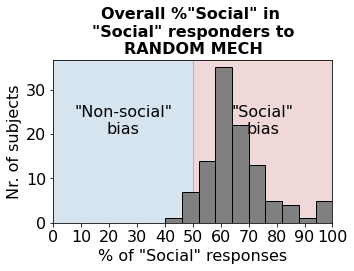

In [28]:
# are responders to "Social" generally biased to respond "Social"?
nr_soc_SocRAND = [len(np.where(i==1)[0])  for i in responses[soc_inds,:]] # nr. of "Social" responses in RAND"Social" responders
nr_soc_NonSocRAND = [len(np.where(i==0)[0])  for i in responses[soc_inds,:]] # nr. of "Non-social" responses in RAND"Social" responders
fr_soc_Soc_pc_ = []
for i in range(len(nr_soc_SocRAND)):
    try:
        fr_soc_Soc_pc_.append(100 * nr_soc_SocRAND[i]/(nr_soc_SocRAND[i]+nr_soc_NonSocRAND[i]))
    except:
        print('NaN')
        #fr_soc_Soc_pc_.append(np.nan)
print(len(nr_soc_SocRAND))
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
ax.axvspan(50,100,color=red_rgb,alpha=alpha)
ax.axvspan(0,50,color=blue_rgb,alpha=alpha)
ax.hist(fr_soc_Soc_pc_, color='grey',bins=10,edgecolor='k')
#ax.vlines(50,plt.ylim()[0],plt.ylim()[1],color='k')
ax.set_xlabel('% of "Social" responses')
ax.set_ylabel('Nr. of subjects')
ax.set_xticks(np.arange(0,101,10))
plt.xlim(0,100)
ax.set_title('Overall %"Social" in \n"Social" responders to\nRANDOM MECH',fontweight='bold')
ax.text(75,20,'"Social"\nbias', ha='center',  color = 'k')
ax.text(25,20,'"Non-social"\nbias', ha='center', color = 'k')

### COAX/BILL

In [30]:
len(np.where(responses[:,0]==1)[0]),len(np.where(responses[:,1]==0)[0]), np.where((responses[:,0]==1)&(responses[:,1]==0))[0].shape

(977, 913, (870,))

In [31]:
# coax vs bill
movie_inds = [0,1]

print([vidnames[i] for i in movie_inds])

subs = (responses[:,movie_inds[0]]==1) & (responses[:,movie_inds[1]]==0) # subs who respoded "nonsocial" to BILL and "social" to COAX

print(f'Nr. Soc and Nr. nonsoc ={len(np.where(subs)[0])}')

_,pval_slope_coaxbill_unc = stats.ttest_rel(coef_slope_coax[subs,:], coef_slope_bill[subs,:],axis=0)
meanDiff_sl_coaxbill = np.nanmean(coef_slope_coax[subs,:]-coef_slope_bill[subs,:],axis=0)

#fdr correction
#_,pval_slope_coaxbill = fdr_correction(pval_slope_coaxbill,.05)
pval_slope_coaxbill_corr = lsu(pval_slope_coaxbill_unc,q=.05)
#pval_slope_coaxbill
pval_slope_coaxbill_unc = pval_slope_coaxbill_unc<.05


['COAXING-B', 'BILLIARD-A']
Nr. Soc and Nr. nonsoc =870


## all movies

In [32]:
# to get an estimate for how many subjects gave all 10 responses. In the data, subjects with <10 responaes have already been assigned an NaN value (so no need to select only good subjects again.)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
len(np.where(count_resp == 10)[0])

814

In [33]:
pval_slope_all_unc = np.empty((268,))
meanDiff_sl_all =  np.empty_like(pval_slope_all_unc)
pval_slope_all_unc[:] = np.nan
meanDiff_sl_all[:] = np.nan

for n in range(268):
    #_,pval_slope_all[n] = stats.ttest_1samp(np.ndarray.flatten(coef_slope_all[:,n,:]),0,nan_policy='omit')
    dat = np.mean(coef_slope_all[:,n,:],axis=1)
    dat = dat[~np.isnan(dat)] # nan values are usually incomplete subjects (it's set that way in 2A_1_A_..allmovies.ipynb)
    _,pval_slope_all_unc[n] = stats.ttest_1samp(dat,0,nan_policy='omit')
    meanDiff_sl_all[n] = np.nanmean(dat)
#_,pval_slope_all = fdr_correction(pval_slope_all)
pval_slope_all_corr = lsu(pval_slope_all_unc,q=.05)
pval_slope_all_unc = pval_slope_all_unc < .05

#pval_slope_all

In [35]:
sign_rand = []
sign_coaxbill = []
sign_rand_coaxbill_Soc = []
sign_rand_coaxbill_NonSoc = []
for n in range(268):#np.where(nodes_coaxbill_rand_all)[0]:
    if np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        sign_rand.append(1)
    else:
        sign_rand.append(0)
    if np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        sign_coaxbill.append(1)
    else:
        sign_coaxbill.append(0)

    if np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)):
        sign_rand_coaxbill_Soc.append(1)
    else:
        sign_rand_coaxbill_Soc.append(0)
    if np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        sign_rand_coaxbill_NonSoc.append(1)
    else:
        sign_rand_coaxbill_NonSoc.append(0)

In [22]:
nodes_coaxbill_rand_all = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))
np.save(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy'),nodes_coaxbill_rand_all)

#(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
# Nodes which (1) show a sig soc v. nonsoc across analyses and
# (2) have the same direction of difference,
np.where(nodes_coaxbill_rand_all), len(np.where(nodes_coaxbill_rand_all)[0])

((array([  8,   9,  11,  12,  13,  15,  18,  19,  21,  28,  29,  30,  42,
          47,  48,  49,  64,  65,  66,  68,  69,  70,  72,  73,  75,  80,
          89,  99, 101, 103, 104, 106, 107, 110, 111, 112, 113, 115, 116,
         118, 127, 144, 146, 148, 150, 152, 154, 155, 156, 176, 191, 198,
         199, 200, 203, 205, 206, 208, 209, 212, 213, 235, 239, 240, 241,
         245, 246, 251, 252, 255]),),
 70)

In [44]:
# are all these nodes with beta soc >beta nonsoc activations or deactivations? let's check

dirn_abs_rand = np.empty((268,))
for n in range(268):
    #S_NS_sign = np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) == np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    absS_gr_absNS = np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    absNS_gr_absS = np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0))
    if  absS_gr_absNS: # & S_NS_sign
        dirn_abs_rand[n] = 1
    elif absNS_gr_absS: # S_NS_sign &
        dirn_abs_rand[n] = -1
    else:
        dirn_abs_rand[n] = 0

dirn_abs_coaxbill = np.empty((268,))
for n in range(268):
    #S_NS_sign = np.sign(np.nanmean(coef_slope_coax[subs,n],axis=0)) == np.sign(np.nanmean(coef_slope_bill[subs,n],axis=0))
    absS_gr_absNS = np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) > np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0))
    absNS_gr_absS = np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) < np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0))
    if absS_gr_absNS: # & S_NS_sign
        dirn_abs_coaxbill[n] = 1
    elif absNS_gr_absS: # & S_NS_sign
        dirn_abs_coaxbill[n] = -1
    else:
        dirn_abs_coaxbill[n] = 0

print('rand: absyes > absno:',len(np.where(dirn_abs_rand[nodes_coaxbill_rand_all] == 1)[0]),
', absno > absyes:',len(np.where(dirn_abs_rand[nodes_coaxbill_rand_all] == -1)[0]))
print('coaxbill: absyes>absno:', len(np.where(dirn_abs_coaxbill[nodes_coaxbill_rand_all] == 1)[0]),
', absno > absyes:', len(np.where(dirn_abs_coaxbill[nodes_coaxbill_rand_all] == -1)[0])) 

# - couple of deactivations in some of the nodes, but mostly activations. 
# for RAND: 7 nodes with smaller slopes (maybe deactivations?) for "social" but in the  other case, only 1 deactivation.
# but not an issue: we look for intersection between these and the other differences with same signs

rand: absyes > absno: 69 , absno > absyes: 1
coaxbill: absyes>absno: 70 , absno > absyes: 0


In [38]:
sign_rand=[]
sign_coaxbill = []
for n in np.where(nodes_coaxbill_rand_all)[0]:
    if np.nanmean(coef_slope_rand[soc_inds,n],axis=0)>0:
        sign1 = 1
    elif np.nanmean(coef_slope_rand[soc_inds,n],axis=0)<0:
        sign1 = -1
    if np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)>0:
        sign2 = 1
    elif np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)<0:
        sign2 = -1
    sign_rand.append([sign1,sign2])
    
    if np.nanmean(coef_slope_coax[subs,n],axis=0)>0:
        sign1 = 1
    elif np.nanmean(coef_slope_coax[subs,n],axis=0)<0:
        sign1 = -1
    if np.nanmean(coef_slope_bill[subs,n],axis=0)>0:
        sign2 = 1
    elif np.nanmean(coef_slope_bill[subs,n],axis=0)<0:
        sign2= -1
    sign_coaxbill.append([sign1,sign2])

sign_rand = np.array(sign_rand)
sign_coaxbill = np.array(sign_coaxbill)

In [39]:
print('RANDOM MECH: "Social"',np.where(sign_rand[:,0]==-1),', "Non-social"', np.where(sign_rand[:,1]==-1))
print('COAXING "Social"',np.where(sign_coaxbill[:,0]==-1),', BILLIARD"Non-social"', np.where(sign_coaxbill[:,1]==-1))

RANDOM MECH: "Social" (array([], dtype=int64),) , "Non-social" (array([27, 41]),)
COAXING "Social" (array([], dtype=int64),) , BILLIARD"Non-social" (array([13, 26]),)


In [40]:
all_betas_pos = []
for n in range(268):
    all4 = (nodes_coaxbill_rand_all[n]) & (np.nanmean(coef_slope_rand[soc_inds,n]) > 0) &  (np.nanmean(coef_slope_rand[nonsoc_inds,n]) > 0) & \
        (np.nanmean(coef_slope_coax[subs,n]) > 0) &  (np.nanmean(coef_slope_bill[subs,n]) > 0)
    if all4:
        all_betas_pos.append(True)
    else:
        all_betas_pos.append(False)
all_betas_pos = np.array(all_betas_pos)

np.save(os.path.join(data_file_loc,'glm_intersecting_nodes_allbetaspos.npy'),all_betas_pos)
np.where(all_betas_pos)[0].shape

(66,)

In [41]:
np.where(sign_rand.flatten()==-1)

(array([55, 83]),)

In [42]:
str1 = ['Soc','Non-soc']
for i in range(2):
    print(str1[i])
    print('Pos: rand:',len(np.where(sign_rand[:,i]==1)[0]))
    print('Pos: coax-bill:',len(np.where(sign_coaxbill[:,i]==1)[0]))
    print('Pos: same rand and coaxbill:',len(np.where((sign_rand[:,i]==1)&(sign_coaxbill[:,i]==1))[0]))

Soc
Pos: rand: 70
Pos: coax-bill: 70
Pos: same rand and coaxbill: 70
Non-soc
Pos: rand: 68
Pos: coax-bill: 68
Pos: same rand and coaxbill: 66


In [44]:
#sign_rand = np.array([bool(i) for i in sign_rand])
#sign_coaxbill = np.array([bool(i) for i in sign_coaxbill])
#sign_rand_coaxbill_Soc = np.array([bool(i) for i in sign_S[:,0]])
#sign_rand_coaxbill_NonSoc = np.array([bool(i) for i in sign_NS[:,0]])

In [47]:
nodes_coaxbill_rand_all_samedirn = (pval_slope_rand_corr) & (pval_slope_coaxbill_corr)  & (pval_slope_all_corr) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) & (dirn_abs_coaxbill == dirn_abs_rand) & \
    (sign_rand_coaxbill_Soc) & (sign_rand_coaxbill_NonSoc)
np.save(os.path.join(data_file_loc,'nodes_coaxbill_rand_all_samedirn.npy'),nodes_coaxbill_rand_all)
len(np.where(nodes_coaxbill_rand_all_samedirn)[0])
#(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
# Nodes which (1) show a sig soc v. nonsoc across analyses,
# (2) have the same direction of difference,
# (3) rand and coaxbill show the same type of difference in abs values: abs_S > abs_NS or vice versa, and 
# (4) have the same directions for Soc and NonSoc across RANDMECH and COAXBILL (e.g. if the mean slope is + for Social anf - for Nonsoc,
# is this generalizable between analyses (keeping "all movies" out of this for now since it's harder to do since we'd have to go to the 
# trial level for it)

66

- 66 nodes show a social v. non-social difference consistent between analyses - i.e., S>NS or NS>S across all conditions, directions for S and NS consistent at least between Random Mech and COAX-BILL and driven by the same group (either S or NS) in both cases

In [48]:
# How many of these are activations?
resptype_s_ns = []
for n in np.where(nodes_coaxbill_rand_all)[0]:
    if np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) ==1:
        str1 = 'act'
    elif np.sign(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) ==-1:
        str1 = 'deact'
    else:
        str1 = 'neither'
    if np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)) == 1:
        str2 = 'act'
    elif np.sign(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)) == -1:
        str2 = 'deact'
    else:
        str2 = 'neither'
    resptype_s_ns.append([n,str1,str2])
resptype_s_ns = np.array(resptype_s_ns)

In [49]:
np.unique(resptype_s_ns[:,1]),np.unique(resptype_s_ns[:,2]) # no deactivations in either cases

(array(['act'], dtype='<U21'), array(['act', 'deact'], dtype='<U21'))

# Plot figs

### Exploratory: is the mean diff > 0 due to positive or negative differences?

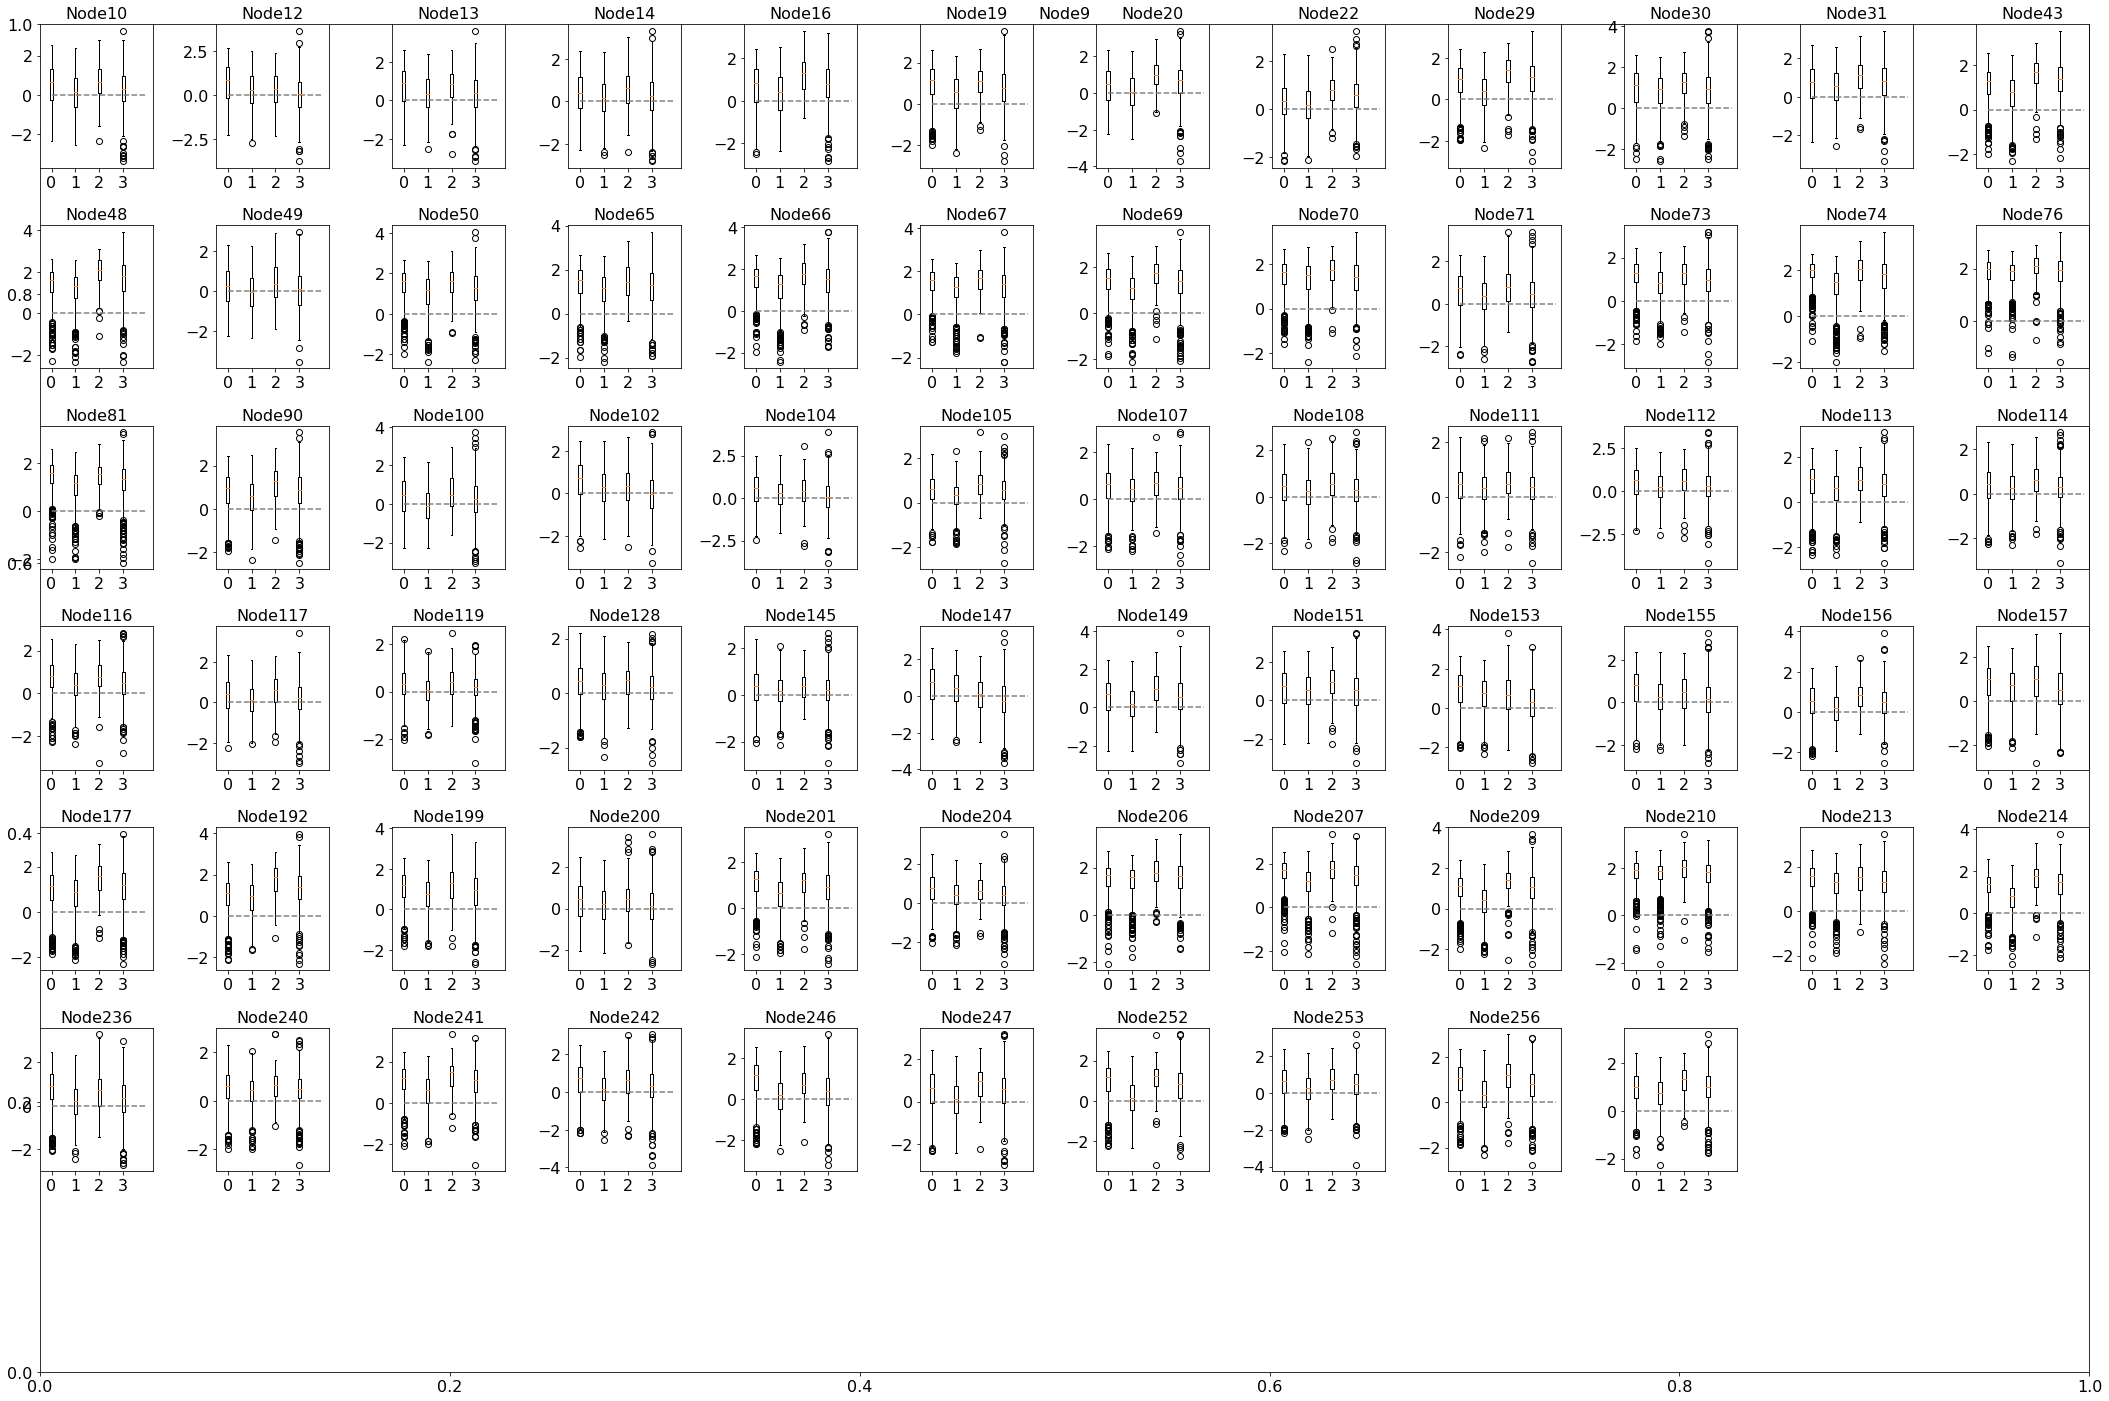

In [51]:
fig = plt.figure(1,figsize=(30,20))
for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.title(f'Node{n+1}')
    ax = fig.add_subplot(7,12,i+1)
    plt.boxplot(coef_slope_coax[subs,n],positions=[0])
    plt.boxplot(coef_slope_bill[subs,n],positions=[1])
    plt.boxplot(coef_slope_rand[responses[:,4]==1,n],positions=[2])
    plt.boxplot(coef_slope_rand[responses[:,4]==0,n],positions=[3])
    plt.hlines(0,0,4,color = 'grey',ls='dashed')
plt.tight_layout()

- looks like all are positive reg coeffts, i.e., positive activations
- In the notebook Plot_movie_timecourses.ipynb, we can also double-check this with some timecourse plots for (1) All movies, and (2) Random Mech

# Plot other figures


In [52]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig3_glm_soc_vs_nonsoc/')

In [53]:
print('all arrays dividided by their std:')
print(f'RAND: min {min(meanDiff_sl_rand/np.std(meanDiff_sl_rand)):.2f}, max {max(meanDiff_sl_rand/np.std(meanDiff_sl_rand)):.2f}')
print(f'COAX-BILL:, min {min(meanDiff_sl_coaxbill/np.std(meanDiff_sl_coaxbill)):.2f}, max {max(meanDiff_sl_coaxbill/np.std(meanDiff_sl_coaxbill)):.2f}')
#print(f'FISHING: min {min(meanDiff_sl_fish/np.std(meanDiff_sl_fish)) :.2f}, max {max(meanDiff_sl_fish/np.std(meanDiff_sl_fish)):.2f}')
print(f'ALL MOVIES:, min {min(meanDiff_sl_all/np.std(meanDiff_sl_all))}, max {max(meanDiff_sl_all/np.std(meanDiff_sl_all)):.2f}')

all arrays dividided by their std:
RAND: min -1.48, max 3.53
COAX-BILL:, min -1.99, max 4.35
ALL MOVIES:, min -0.997095952789771, max 3.51


In [75]:
# oldv (don't run again to keep these values)
print(f'ALL MOVIES:, min {min(meanDiff_sl_all/np.std(meanDiff_sl_all))}, max {max(meanDiff_sl_all/np.std(meanDiff_sl_all)):.2f}')

all arrays dividided by their std:
RAND: min -1.48, max 3.53
COAX-BILL:, min -1.99, max 4.35
ALL MOVIES:, min -1.1036128503783433, max 3.53


In [54]:
print('based on raw values of two comparable analyses:')
print(f'RAND: min {min(meanDiff_sl_rand):.2f}, max {max(meanDiff_sl_rand):.2f}')
#print(f'FISHING: min {min(meanDiff_sl_fish) :.2f}, max {max(meanDiff_sl_fish):.2f}')

based on raw values of two comparable analyses:
RAND: min -0.21, max 0.50


- hence for scatterplots, min = -2, max = 4.5 in the function below.
- for the brain maps of rand and fish, we need actual un-normalized values: -.22,.55


In [55]:
def plot_fig(X,Y,xlabel,ylabel):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'mean "social"-"nonsocial"\nper node',markersize=8)
    r,p = stats.pearsonr(X,Y)
    
    plt.xlabel(xlabel+'/std')
    plt.ylabel(ylabel+'/std')
    xymin,xymax =  -2.5,4.5
    
    # best_fit_line(X,Y):
    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of \nbest fit\n(all nodes)') #plt.title(np.poly1d([m,b]))

    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)
    xpos = xymin#+ .01*(xmax-xmin)
    ypos = xymin+ .8*(xymax-xymin)
    #plt.text(xpos,ypos,f'r={r:.2f},\np={p:.1e}',fontsize=20)
    plt.annotate(f'r={r:.2f},\np={p:.1e}', xy=(.05, 0.85), xycoords='axes fraction')
    plt.xticks([-2,0,2,4])
    plt.yticks([-2,0,2,4])
    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
   

def plot_sig_nodes(X,Y,inds):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='o',mfc='w', mec='k',label = 'pair-wise sig.',ms=8)
    plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],ls='None',marker='o',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across all\ncomparisons\nexcept FISH',ms=4)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)
    

 
0.3926 x + 0.1434
 
0.4229 x + 0.2792
 
0.5533 x + 0.4083


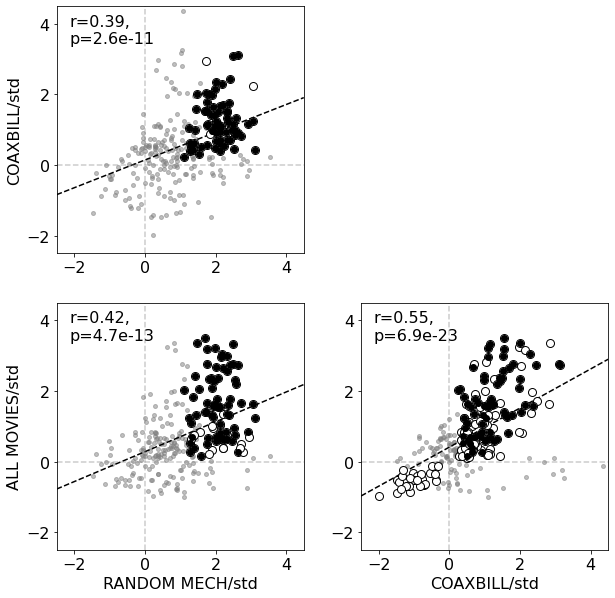

In [57]:
# not used in the final version
dims = [10,10]
fig= plt.figure(1,figsize = dims)

div = [.05,.38,.71]
w,h = .3,.3

#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
#ax.set_position([div[0],div[1],w,h]) 
X,Y = meanDiff_sl_rand,meanDiff_sl_coaxbill
plot_fig(X,Y,'RANDOM MECH','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_coaxbill_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) # & (dirn_coaxbill==dirn_rand)
plot_sig_nodes(X,Y,inds)
plt.xlabel('')

ax = fig.add_subplot(2,2,3)
X,Y = meanDiff_sl_rand,meanDiff_sl_all
plot_fig(X,Y,'RANDOM MECH','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(2,2,4)
X,Y = meanDiff_sl_coaxbill,meanDiff_sl_all
plot_fig(X,Y,'COAXBILL','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_coaxbill_corr) & (pval_slope_all_corr) & (np.sign(meanDiff_sl_coaxbill) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)
plt.ylabel('')

plt.savefig(os.path.join(fig_save_loc,'fig2S_scatterplot.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


#plt.tight_layout()

## Plot brainmaps

In [58]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib
from nilearn.plotting import plot_stat_map

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [59]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.6...","{'coords': [9.599999999999994, 17.618823529411...","{'coords': [5.270633397312864, 35.032629558541...","{'coords': [15.647840531561457, 34.18604651162...","{'coords': [8.283887468030684, 46.058823529411...","{'coords': [14.581460674157299, 64.75280898876...","{'coords': [30.41914191419142, 54.795379537953...","{'coords': [44.469325153374236, 46.09509202453...","{'coords': [28.814814814814817, 51.16316316316...","{'coords': [8.521081081081078, 53.28, 23.88540...",...,"{'coords': [-10.399527186761233, 10.8770685579...","{'coords': [-14.491582491582491, -3.5488215488...","{'coords': [-24.77079107505071, 5.537525354969...","{'coords': [-9.427230046948353, -25.5399061032...","{'coords': [-4.68474576271187, -10.24067796610...","{'coords': [-11.407792207792212, -25.563636363...","{'coords': [-4.821052631578951, -21.5115789473...","{'coords': [-4.227272727272734, -37.8977272727...","{'coords': [-6.9375, -33.13068181818181, -39.3...","{'coords': [-5.697885196374628, -18.9667673716..."


In [63]:
rois = [eval(shen268_lbl[str(n+1)][0])['name'] for n in np.where(nodes_coaxbill_rand_all)[0]]
for i,roi in enumerate(rois):
    print(np.where(nodes_coaxbill_rand_all)[0][i],roi)
print(f'{len(rois)} ROIs sig. at p-value threshold .05\n')

8 100.00% Frontal_Pole
9 48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
11 56.57% Superior_Frontal_Gyrus; 41.14% Frontal_Pole
12 33.82% Middle_Frontal_Gyrus; 33.82% Frontal_Pole; 26.94% Superior_Frontal_Gyrus; 5.42% no_label
13 98.80% Middle_Frontal_Gyrus
15 42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_Cortex
18 56.48% Frontal_Pole; 27.04% Inferior_Frontal_Gyrus_pars_triangularis; 14.09% Middle_Frontal_Gyrus
19 43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis
21 76.55% Middle_Frontal_Gyrus; 21.03% Inferior_Frontal_Gyrus_pars_opercularis
28 80.29% Superior_Frontal_Gyrus; 18.49% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
29 53.27% Superior_Frontal_Gyrus; 44.39% Middle_Frontal_

In [66]:
def color_rois(values):
    
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

cols = ['k','grey','g']
lw = [3,2,1]
len(np.where(pval_slope_rand_unc)[0])

117

In [67]:
from nilearn.surface import vol_to_surf
from nilearn.plotting import plot_glass_brain, plot_surf_roi,plot_stat_map,plot_img,plot_surf_contours
from nilearn import datasets
bg_img = datasets.load_mni152_template()
from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage()
#coords = [10*int(i) for i in np.linspace(-4,

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_right']
np.unique(parcellation).shape

(75,)

In [68]:
# these are the regions we want to outline
regions_dict = {b'G_postcentral': 'Postcentral gyrus',
                b'G_precentral': 'Precentral gyrus'}

# get indices in atlas for these labels
regions_indices = [np.where(np.array(destrieux_atlas['labels']) == region)[0][0]
                   for region in regions_dict]
regions_indices

[28, 29]

In [69]:
# same movie: rand

movie_ind = 4

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

#print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand_unc1 = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

pval_slope_rand_unc1[224]

0.02191578373013191

In [75]:
'''# visualizing nodes
nodes = np.zeros((268,))
#nodes[options] = np.arange(7)# meanDiff_sl_rand[options]
nodes[224] = meanDiff_sl_rand[224]

texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = 'RdBu_r', colorbar=False, symmetric_cmap=True, 
                            bg_map=fsaverage.sulc_left,)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour,figure=surf_plot1, legend=True,levels = [1], colors=['k'])

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = 'RdBu_r', colorbar=True, symmetric_cmap=True, 
                            bg_map=fsaverage.sulc_left, view = 'medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
plot_surf_contours(fsaverage.infl_left, texture_contour,figure=surf_plot2, legend=True,levels = [1], colors=['k'])'''

'# visualizing nodes\nnodes = np.zeros((268,))\n#nodes[options] = np.arange(7)# meanDiff_sl_rand[options]\nnodes[224] = meanDiff_sl_rand[224]\n\ntexture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation=\'nearest\',radius =1, n_samples=1)\nsurf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi=\'left\',cmap = \'RdBu_r\', colorbar=False, symmetric_cmap=True, \n                            bg_map=fsaverage.sulc_left,)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":\'ball\'})\ntexture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation=\'nearest\',radius =1, n_samples=1)\nplot_surf_contours(fsaverage.infl_left, texture_contour,figure=surf_plot1, legend=True,levels = [1], colors=[\'k\'])\n\nsurf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi=\'left\',cmap = \'RdBu_r\', colorbar=True, symmetric_cmap=True, \n                            bg_map=fsaverage.sulc_left, view = \'medial\')#,v

In [76]:
def surf_plot(fig,ax,nodes,params):
    title_txt = params['title']
    txt  = params['txt']
    vmin = params['vmin']
    vmax = params['vmax']

    #LH
    ax_surf = ax[0,0]
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left,axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot1.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    #surf_plot1.axes[0].set_title(title_txt,fontsize=20,color='k',ha='left')
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes = ax_surf,figure=surf_plot1, legend=True,levels = [1], colors=['k'])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

    ax_surf = ax[1,0]
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left, view = 'medial',axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot2.axes[1].text(4,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    #surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    plot_surf_contours(fsaverage.infl_left, texture_contour, axes = ax_surf,figure=surf_plot2, legend=True,levels = [1], colors=['k'])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

    #RH
    ax_surf = ax[0,1]
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right,axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot3.axes[1].text(4,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    #surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes = ax_surf,figure=surf_plot3, legend=True,levels = [1], colors=['k'])
    surf_plot3.axes[4].text(10,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    #surf_plot3.axes[4].colorbar
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    box = surf_plot3.axes[4].get_position()
    surf_plot3.axes[4].set_position([box.x0*.93, box.y0-.3, box.width, box.height*2])  # move a bit the bar to the right, need to divide by number of columns (to move relative to last figure only, not to overall row, else will get too far away)
    

    ax_surf = ax[1,1]
    surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right, view ='medial',axes = ax_surf)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    plot_surf_contours(fsaverage.infl_right, texture_contour, axes = ax_surf,figure=surf_plot4, legend=True, levels = [1], colors=['k'])#, labels=['Sig. (q<.05) across\n(a),(c),(d)'])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

    
    ax[0,0].dist = 7 # change viewing distance to "zoom in" to surface plots
    ax[0,1].dist = 7
    ax[1,0].dist = 7
    ax[1,1].dist = 7

    #fig.colorbar(surf_plot3.axes[2])
    plt.subplots_adjust(left=0,
                        bottom=0, 
                        right=.8, 
                        top=1, 
                        wspace=0.0, 
                        hspace=-.1)
    #fig.colorbar(surf_plot2, shrink=2, aspect=10)
#box = surf_plot3.axes[4].get_position()
#surf_plot3.axes[4].set_position([box.x0, box.y0, box.width, box.height])  # move a bit the bar to the right, need to divide by number of columns (to move relative to last figure only, not to overall row, else will get too far away)
    

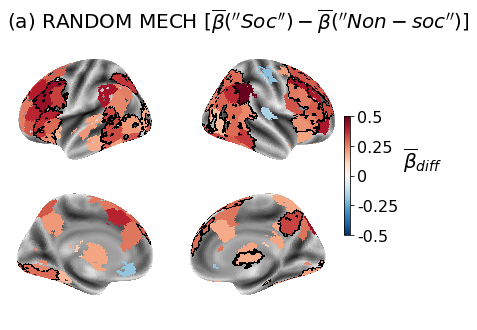

In [77]:
vmin,vmax = -.5,.5
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = '(a) RANDOM MECH ['r"$\overline{\beta}{(''Soc'')}-\overline{\beta}{(''Non-soc'')}$"']'
txt = r"$\overline{\beta}_{diff}$"
#txt = '  'r"$\overline{\beta}{(''Soc'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non}$" + '\n   ' + r"$soc'')$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False

nodes = np.zeros((268,))
nodes[pval_slope_rand_unc] = meanDiff_sl_rand[pval_slope_rand_unc]

# surface plot
fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'RAND/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

In [80]:
coords = [-44,-34,-24]

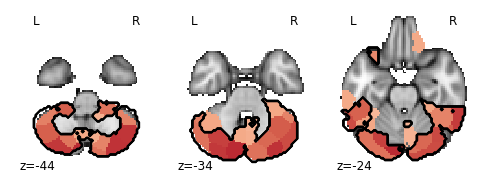

In [81]:
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'RAND/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

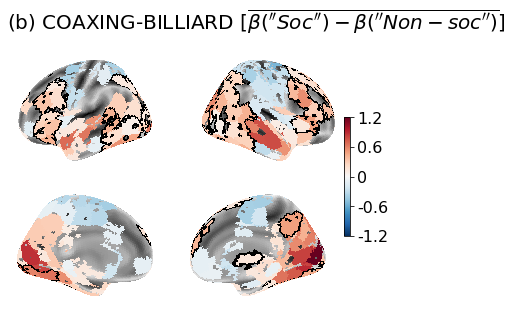

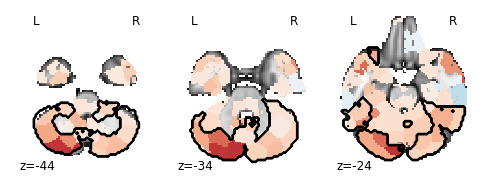

In [82]:
vmin,vmax = -max(meanDiff_sl_coaxbill),max(meanDiff_sl_coaxbill)
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'
title_txt = '(b) COAXING-BILLIARD ['r"$\overline{\beta(''Soc'')-\beta(''Non-soc'')}$"']'
txt = '      '
#txt = r"$\overline{\beta(''Soc'')-}$" + '\n' + r"$\overline{\beta(''Non-soc'')}$"
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_coaxbill_unc] = meanDiff_sl_coaxbill[pval_slope_coaxbill_unc]

fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

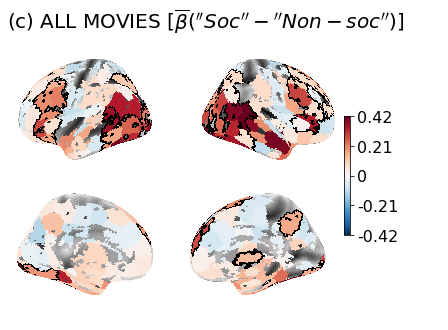

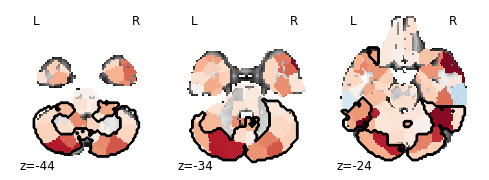

In [84]:
# oldv
vmin,vmax = -max(meanDiff_sl_all),max(meanDiff_sl_all)
cmap = 'RdBu_r'
#txt = r' $\overline{\beta}(\""")-$' + '\n' + r'$\overline{\beta}_{Non-social}$'+ '\n'

title_txt = '(c) ALL MOVIES ['r"$\overline{\beta}(''Soc''-''Non-soc'')$"']'
txt = '      '
#txt = '  'r"$\overline{\beta}{(''Social'')}-$" + '\n  ' + r"$\overline{\beta}{(''Non-social'')}$"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)

nodes = np.zeros((268,))
nodes[pval_slope_all_unc] = meanDiff_sl_all[pval_slope_all_unc]

fig,ax = plt.subplots(nrows=2, ncols= 2,figsize=(6,4),subplot_kw={'projection': '3d'})
ax[0,0].set_title(title_txt,loc='left',fontsize=20)
fig.set_tight_layout(False)
params = {'title':title_txt,'txt':txt, 'vmin': vmin, 'vmax':vmax}
surf_plot(fig,ax,nodes,params)
plt.savefig(os.path.join(fig_save_loc,f'ALL/surf_all4.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

img = roi_to_brain(pd.Series(nodes), mask_x)
#coords = [-50,-40,-30,-20,-10,0,10,25,40,50,60] # initial exploration
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles ='-',filled=False)
plt.savefig(os.path.join(fig_save_loc,f'ALL/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# Plot timecourses

In [652]:
tcs_run_z.shape

(1048, 268, 31, 10)

In [654]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1
    

#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\nrun-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm',f'timecourse-all-movies_zscorenorm{suff}.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_run_z.shape)

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm',f'timecourse-all-movies_zscorenorm{suff}.npy') # load fmri data
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_trial_z.shape)
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_trial_z.shape)


# collapse across movies and runs (for timecourse plots)

tcs_run_resh_yes = []
tcs_run_resh_no = []
tcs_run_resh_unsure = []
subs_resh_yes = []
subs_resh_no = []
subs_resh_unsure = []
for m in range(0,10):
    tcs_run_resh_yes.append(tcs_run_z[responses[:,m]==1,:,:,m])# subsm * 268 * 31
    tcs_run_resh_no.append(tcs_run_z[responses[:,m]==0,:,:,m])# subsm * 268 * 31
    tcs_run_resh_unsure.append(tcs_run_z[responses[:,m]==9,:,:,m])# subsm * 268 * 31
    subs_resh_yes += list(np.where(responses[:,m]==1)[0])# subsm * 268 * 31, keep track of subject seq
    subs_resh_no  += list(np.where(responses[:,m]==0)[0])# subsm * 268 * 31
    subs_resh_unsure  += list(np.where(responses[:,m]==9)[0])# subsm * 268 * 31
tcs_run_resh_yes = np.concatenate(tcs_run_resh_yes,axis=0)
tcs_run_resh_no  = np.concatenate(tcs_run_resh_no,axis=0)
tcs_run_resh_unsure  = np.concatenate(tcs_run_resh_unsure,axis=0)
print('Across all movies: \nyes:'+ str(tcs_run_resh_yes.shape) + ',\nno:' + str(tcs_run_resh_no.shape) + ',\nunsure:' + str(tcs_run_resh_unsure.shape))

#np.concatenate((movieTC_yes,movieTC_no),axis=0).shape

[6 13 13 13 13 6 13 13 13 13]

run-wise norm data.
before: (1049, 268, 56, 10)
after: (1049, 268, 31, 10)

trial-wise norm data.
before: (1049, 268, 56, 10)
after: (1049, 268, 31, 10)
Across all movies: 
yes:(4956, 268, 31),
no:(4411, 268, 31),
unsure:(671, 268, 31)


In [655]:
TR = .72

# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255

alpha = .2 # transparency inside boxplots, for datapts etc.

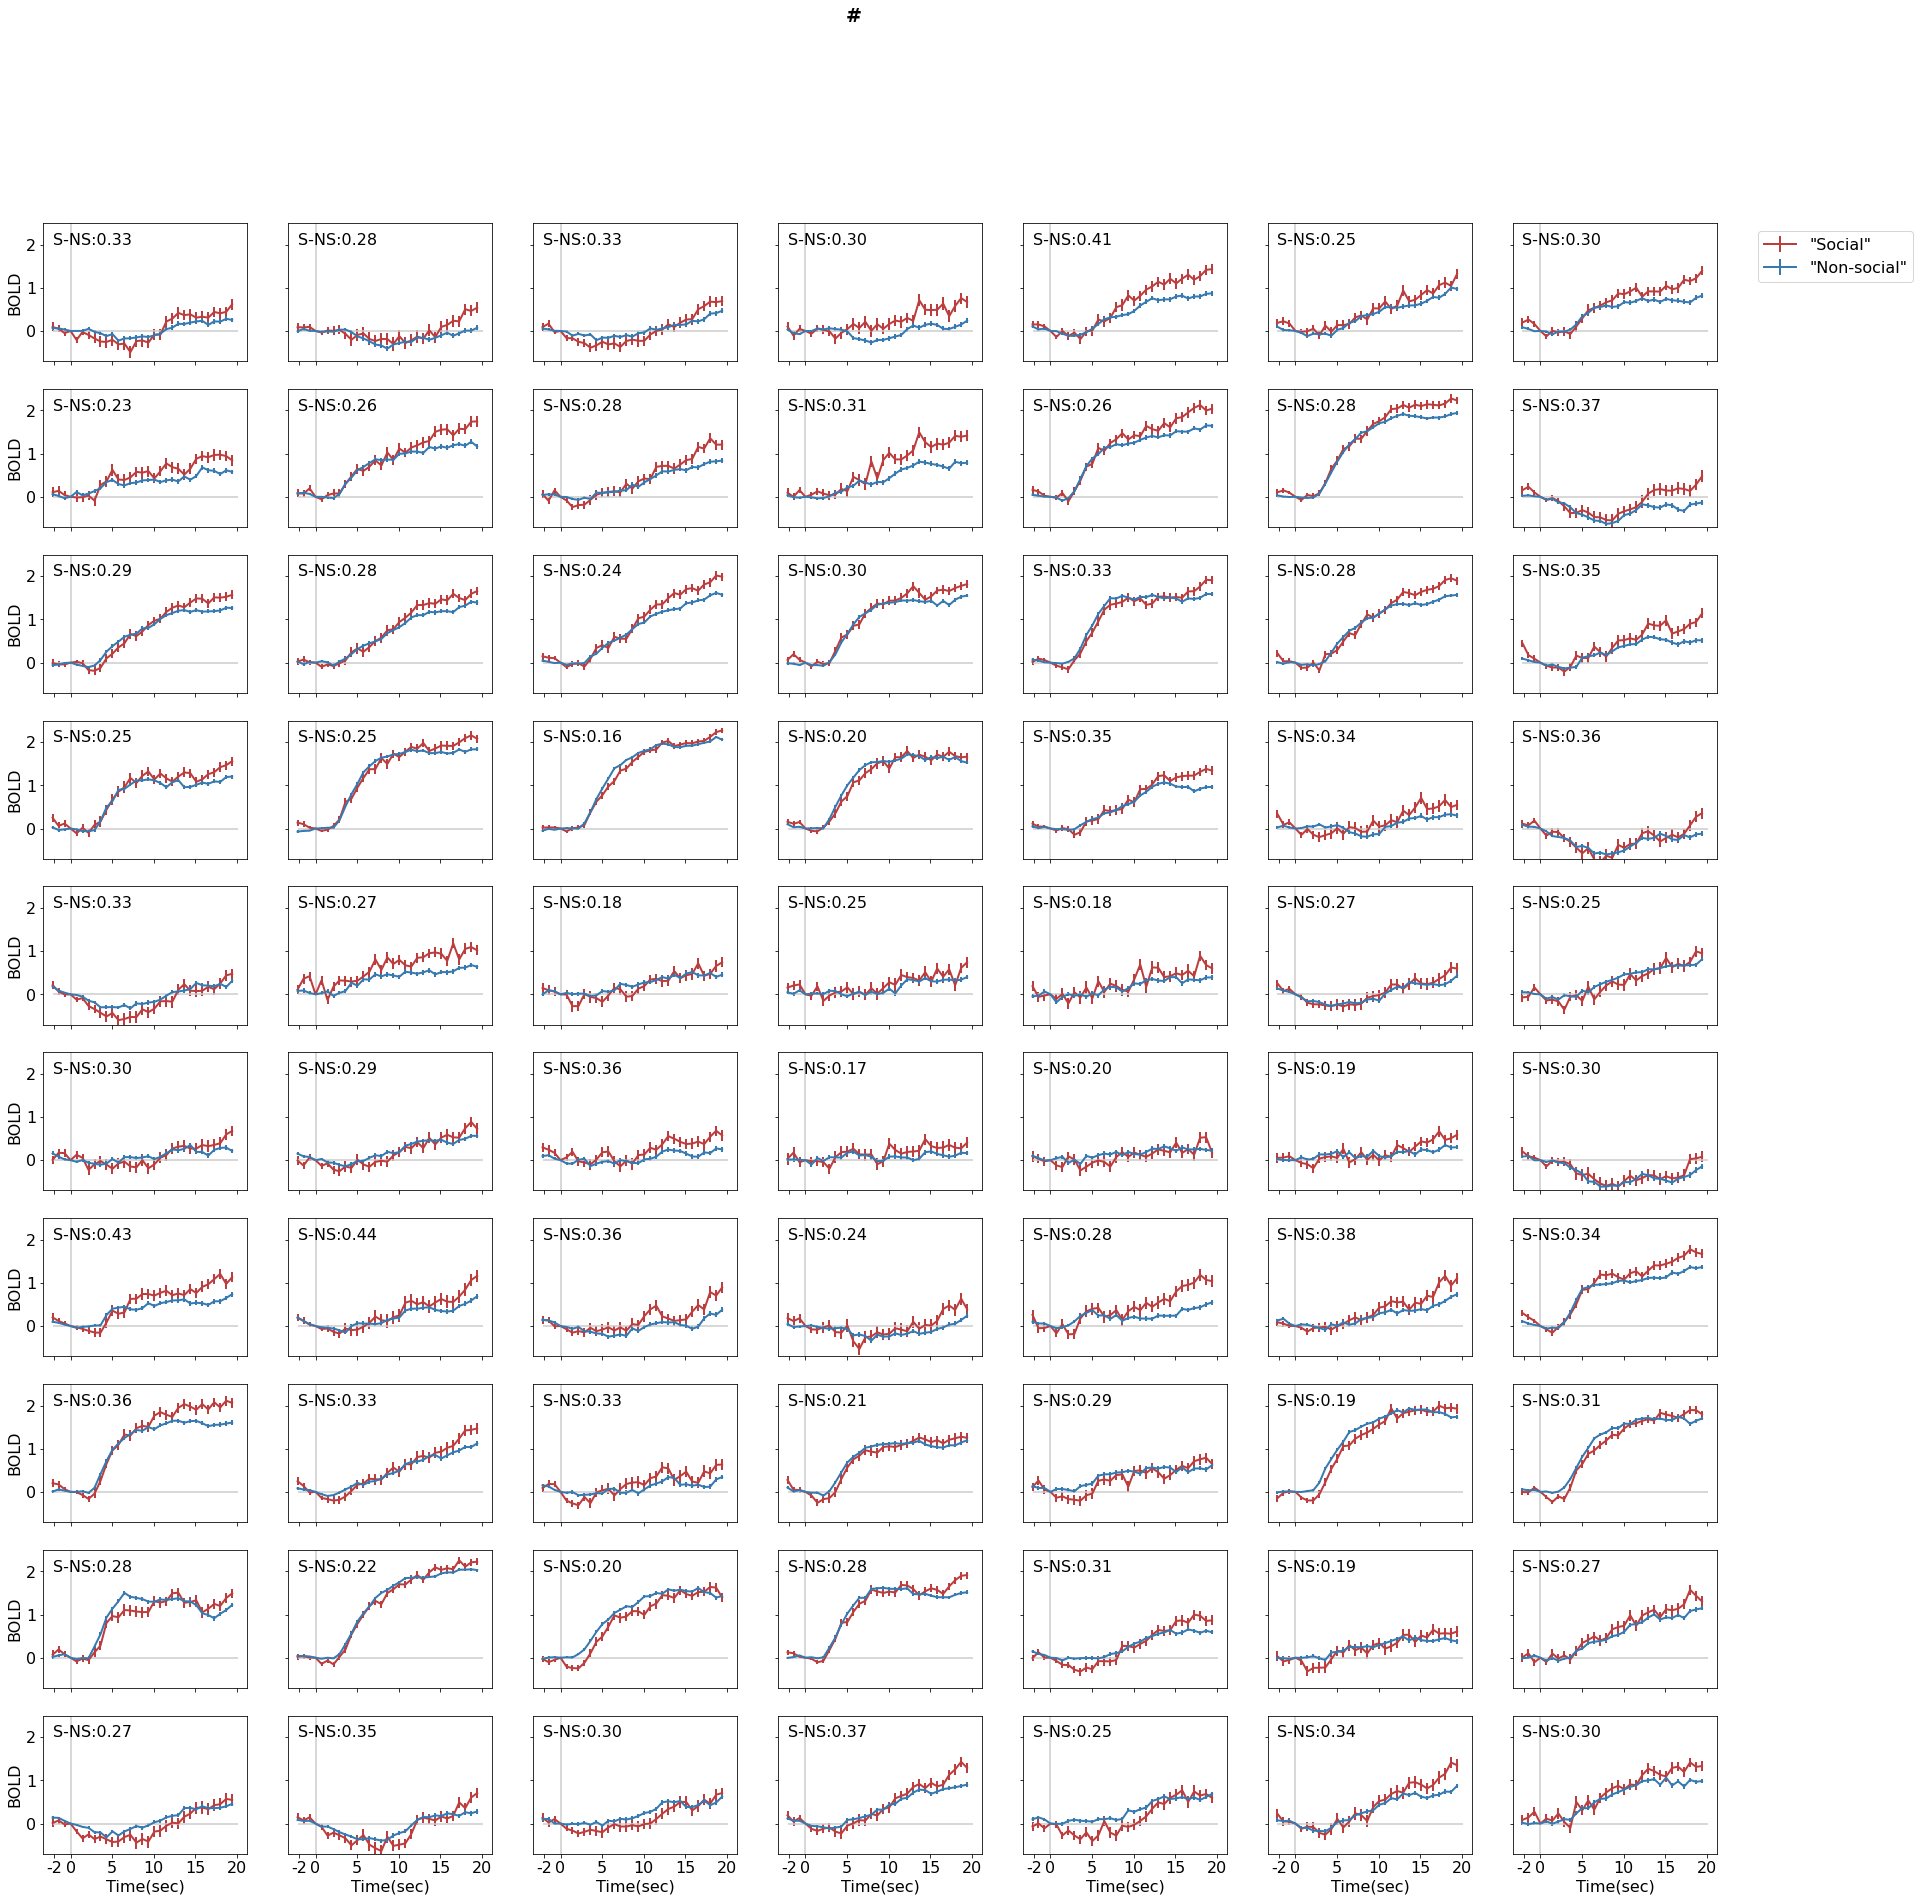

In [657]:
plot_type = 'rand' # CHANGE WHAT TO PLOT HERE!! 'rand', 'all','coax-bill' or 'fish'

[ymin,ymax] = [-.7,2.5]
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]

nrows = 10
nodes = np.where(nodes_coaxbill_rand_all)[0]
ncols = int(np.ceil(len(nodes)/nrows))
#line_loc = []
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex=True, sharey=True, figsize = (30,30)) # figsize = (20,15))

plt.suptitle('#', fontweight='bold')    

for i,n in enumerate(nodes): #for i,n in enumerate(df['Nodes']):
    #fig, ax = plt.figure(i+1,figsize=(10,5))   

    if ncols == 1:
        ax1 = ax[i]
    else:
        r = int(np.floor(i/ncols))
        c = int(i % ncols)
        ax1 = ax[r,c]

    if plot_type == 'rand':
        movieTC_yes = tcs_run_z[responses[:,4]==1,n,:,4] # nsubs * ntimepts
        movieTC_no  = tcs_run_z[responses[:,4]==0,n,:,4] # nsubs * ntimepts
        #movieTC_unsure = tcs_run_z[responses[:,4]==9,n,:,4] # nsubs * ntimepts
        #movie_yes_or_no = tcs_run_z[(responses[:,4]==1)|(responses[:,4]==0),n,:,4]
    elif plot_type == 'all':
        movieTC_yes = tcs_run_resh_yes[:,n,:]
        movieTC_no  = tcs_run_resh_no[:,n,:]
        #movieTC_unsure  = tcs_run_resh_unsure[:,n,:] 
    elif plot_type == 'coax-bill':
        movieTC_yes = tcs_trial_z[(responses[:,0]==1) & (responses[:,1]==0),n,:,0] # nsubs * ntimepts
        movieTC_no  = tcs_trial_z[(responses[:,0]==1) & (responses[:,1]==0),n,:,1] # nsubs * ntimepts
        #movieTC_unsure = tcs_run_z[responses[:,4]==9,n,:,4] # nsubs * ntimepts
        #movie_yes_or_no = tcs_run_z[(responses[:,4]==1)|(responses[:,4]==0),n,:,4]
    
     
    #  
    ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
    #ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movie_yes_or_no,axis=0),stats.sem(movie_yes_or_no,axis=0,nan_policy='omit'),color = 'k',linewidth=2,label ='"Social"/"Non-social"')
    #ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmedian(movieTC_unsure,axis=0),stats.sem(movieTC_unsure,axis=0,nan_policy='omit'),color = 'orange',linewidth=2,label ='"Unsure"')
    ax1.vlines(tr0_ind,ymin,ymax,color=[.8,.8,.8])
    ax1.hlines(0,0,31,color=[.8,.8,.8])
    ax1.set_ylim(ymin,ymax)
    if plot_type == 'rand':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_rand[n]:.2f}')
    elif plot_type == 'all':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_all[n]:.2f}')
    elif plot_type == 'coax-bill':
        ax1.text(0,.8*ymax,f'S-NS:{meanDiff_sl_coaxbill[n]:.2f}')

    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(xlbls)
    #ax[r,0].set_ylabel('BOLD\n(a.u.)')
    #txt = '\n'.join(eval(shen268_lbl[str(n+1)][0])['name'].split(';'))
    #ax1.text(35,0,txt)
    if i %ncols==0:
        ax1.set_ylabel('BOLD')# activity (run-nomralized)')
    if r == nrows-1:
        ax1.set_xlabel('Time(sec)')
    if (r==0) & (c==ncols-1):
        ax1.legend(bbox_to_anchor = [2,1])

if ncols > 1:
    for i in range(int(nrows*ncols-len(nodes))):
        ax[r,c+1+i].axis('off')
#plt.tight_layout()

In [34]:
coef_slope_rand.shape

(1048, 268)